# Analyze an Imperfect Dataset

5 Feb 2017 | Claire Gatenby

Source: https://data.seattle.gov/Public-Safety/Seattle-Police-Department-911-Incident-Response/3k2p-39jp/data

In [4]:
import pandas as pd
from pygeocoder import Geocoder

In [5]:
data = pd.read_csv("Seattle_911_Incident_Response.csv", low_memory=False)

In [6]:
data.columns

Index(['CAD CDW ID', 'CAD Event Number', 'General Offense Number',
       'Event Clearance Code', 'Event Clearance Description',
       'Event Clearance SubGroup', 'Event Clearance Group',
       'Event Clearance Date', 'Hundred Block Location', 'District/Sector',
       'Zone/Beat', 'Census Tract', 'Longitude', 'Latitude',
       'Incident Location', 'Initial Type Description',
       'Initial Type Subgroup', 'Initial Type Group', 'At Scene Time'],
      dtype='object')

**Question 1:** What is the 5 most common subjects of 911 calls

using panads `value_counts` method and `nlargest` can return the top 5 occurances for the 'Even Clearance Description' Column.

In [14]:
crime_type = data['Event Clearance Description'].value_counts()
crime_type.nlargest(n=5)

SUSPICIOUS PERSON                                156507
DISTURBANCE, OTHER                               130919
TRAFFIC (MOVING) VIOLATION                       101358
PARKING VIOLATION (EXCEPT ABANDONED VEHICLES)    100512
LIQUOR VIOLATION - INTOXICATED PERSON             56977
Name: Event Clearance Description, dtype: int64

**Question 2:** What is the most common disctrict for  Parking Violation

Using Geocoder package to perform a reverse geocode on the district latitude and longitude for the district with the highest count for Parking Violations.

In [15]:
bad_parkers = data[(data['Event Clearance Description'] == 'PARKING VIOLATION (EXCEPT ABANDONED VEHICLES)')]
district_counts = bad_parkers['District/Sector'].value_counts()
max_dist = district_counts.nlargest(n=1)
district = data[data['District/Sector'] == max_dist.keys()[0]].iloc[0]
results = Geocoder.reverse_geocode(district['Latitude'], district['Longitude'])

print(max_dist[0],
      'Parking violations in',
      results.current_data['address_components'][2]['long_name'])

10279 Parking violations in Central District


**Question 3**
What is the most common disctrict for Car Prowls.

Using Geocoder package to perform a reverse geocode on the district latitude and longitude for the district with the highest count for Car Prowls.

In [16]:
prowl = data[(data['Event Clearance Description'] == 'THEFT - CAR PROWL')]
district = prowl['District/Sector'].value_counts()
max_dist = district.nlargest(n=1)
dist = data[data['District/Sector'] == max_dist.keys()[0]].iloc[0]
results = Geocoder.reverse_geocode(dist['Latitude'], dist['Longitude'])

print(district.nlargest(n=1)[0],
      ' Car Prowl thefts occured in ',
      results.current_data['address_components'][2]['long_name'])

4939  Car Prowl thefts occured in  Central Business District


**Question 4:** What disctricts have the most and least 911 calls logged.

Where are all the calls coming from? Using Geocoder package to perform a reverse geocode on the district latitude and longitude for the district with the highest count of logs in the dataset.

In [17]:
district_counts = data['District/Sector'].value_counts()
max_dist = district.nlargest(n=1)
min_dist = district.nsmallest(n=1)

max_dist = data[data['District/Sector'] == max_dist.keys()[0]].iloc[0]
min_dist = data[data['District/Sector'] == min_dist.keys()[0]].iloc[1]

min_neighborhood = Geocoder.reverse_geocode(min_dist['Latitude'], min_dist['Longitude'])
max_neighborhood = Geocoder.reverse_geocode(max_dist['Latitude'], max_dist['Longitude'])

print (max_neighborhood.current_data['address_components'][2]['long_name'],
       ' has the most 911 calls and ',
       min_neighborhood.current_data['address_components'][2]['long_name'],
       ' has the least 911 calls.'
      )

Central Business District  has the most 911 calls and  Westminster Triangle  has the least 911 calls.


**Question 5:** Logged calls reporting a Homicide by district/sector.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

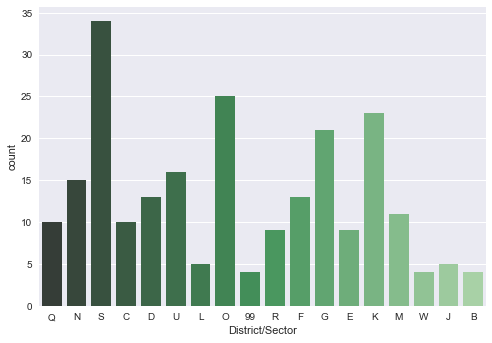

In [27]:
homicides = data[data['Event Clearance Description'] == 'HOMICIDE']
sns.countplot(x='District/Sector', data=homicides, palette="Greens_d")
sns.plt.show()